In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

- The dataset contains `no null values`

In [6]:
df.duplicated().sum()

np.int64(418)

In [7]:
df = df.drop_duplicates()

In [8]:
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
positive    24884
negative    24698
Name: count, dtype: int64


## Data Preprocessing

In [9]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment'].map({'positive':1, 'negative':0})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Hp\AppData\Local\Temp\ipykernel_8344\1363325554.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


## Building the model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       256,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,449 (1.01 MB)

 Trainable params: 264,449 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8143 - loss: 0.4075 - val_accuracy: 0.8717 - val_loss: 0.2984
Epoch 2/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8889 - loss: 0.2648 - val_accuracy: 0.8695 - val_loss: 0.3041
Epoch 3/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9133 - loss: 0.2160 - val_accuracy: 0.8693 - val_loss: 0.3155
Epoch 4/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9616 - loss: 0.1176 - val_accuracy: 0.8623 - val_loss: 0.4019
Epoch 5/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9914 - loss: 0.0357 - val_accuracy: 0.8574 - val_loss: 0.5320
Epoch 6/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9988 - loss: 0.0081 - val_accuracy: 0.8572 - val_loss: 0.6728
Epoch 7/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8586 - val_loss: 0.7667
Epoch 8/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 1.0000 - loss: 3.5200e-04 - val_accuracy

In [12]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8589 - loss: 0.9667
Test Accuracy: 0.86


## Visualization

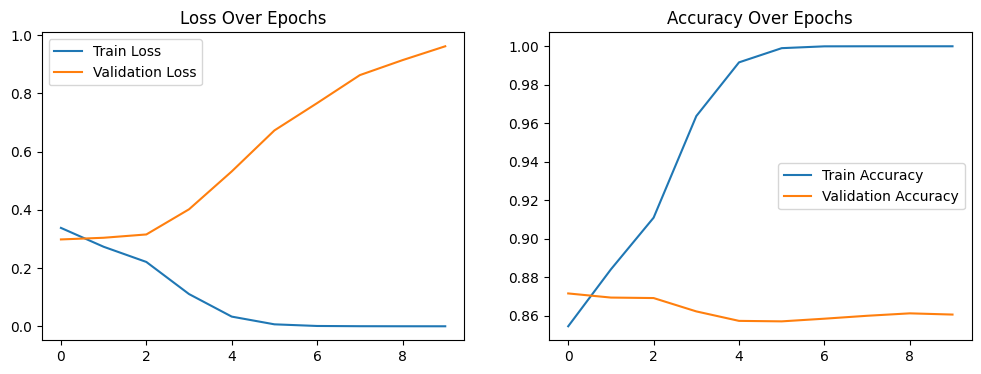

In [13]:
# Plot training vs validation loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

# Plot training vs validation accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

**Key Insights**
a) Text Preprocessing is Critical
HTML/Noise Removal: Removing HTML tags (BeautifulSoup) and URLs (regex) significantly cleaned the data, improving model focus on relevant text.

**Overfitting:**

- Training accuracy reaches 100% by Epoch 7, but validation accuracy plateaus at ~86%.

- Validation loss increases steadily (0.30 → 0.96), indicating the model memorizes training data.

- Final Test Accuracy: 86%

- Matches validation accuracy, confirming generalization to unseen data.

**Challenges Faced & Solutions**
1. Slow Preprocessing
Problem: BeautifulSoup + word_tokenize + stopwords on 50K reviews took 17+ minutes.

Solution: Reducing max_features to 2000 sped up training


2. Overfitting
Problem: Validation accuracy stalled at 86% while training hit 100%.


**Improvements**
1. Add Regularization:
Try adding a dropout layer (like Dropout(0.5)) between your dense layers. This helps prevent the model from relying too much on any one part of the network.

2. Use Early Stopping:
Include early stopping in your training process so that you stop training when the validation loss stops decreasing. This can stop the model from overfitting.

3. Tune Hyperparameters:
Experiment with the learning rate and batch size. Sometimes smaller changes can lead to better performance on the validation set.

4. Improve Text Representation:
Consider exploring other ways to convert text into numbers, such as using word embeddings (GloVe, word2vec) rather than just TF-IDF, which might capture the meaning of the reviews better.
